## Assumption
We assume there is no association between men's BMI and women's BMI. In this notebook, we will carry out the predecure to test this assumption.

In [4]:
file.name = file.path("data", "bmi_age.txt")
data_bmi = read.table(file = file.name, header = TRUE, stringsAsFactors = FALSE)
attach(data_bmi)

The following objects are masked from data_bmi (pos = 3):

    AGE, BMI, PID, SEX

The following objects are masked from data_bmi (pos = 4):

    AGE, BMI, PID, SEX



[1] 5.6

### Calculate Test Statistic: Mean BMI Difference (Men-Women)

In [6]:
test_statistic<-mean(BMI[SEX==1])-mean(BMI[SEX==0])
test_statistic

[1] 5.6

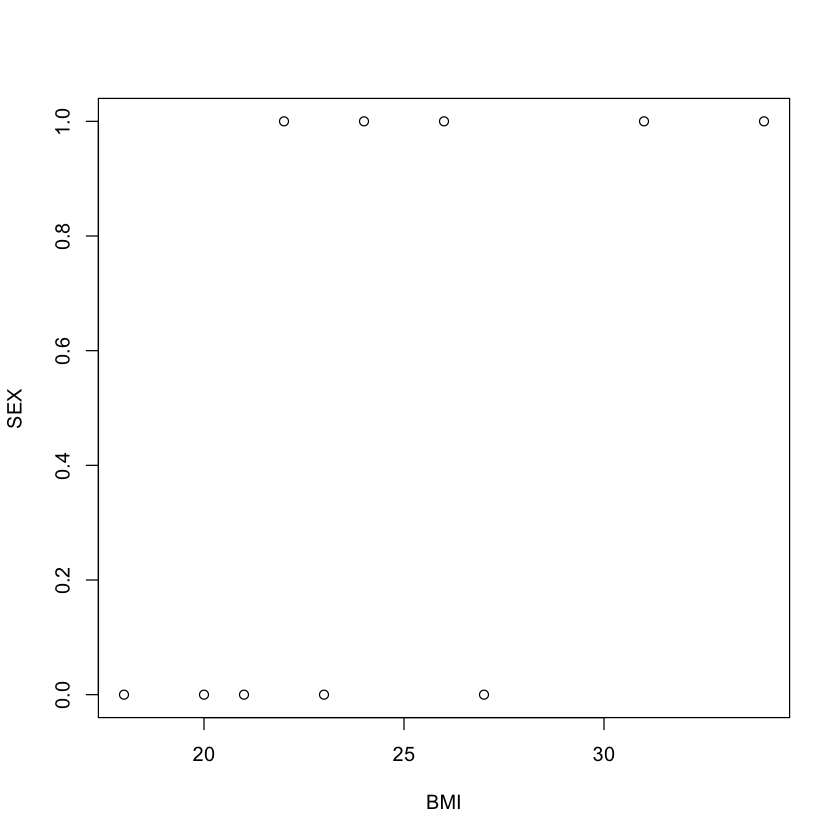

In [7]:
plot(BMI, SEX)

## Random permutations
Random permutations are a type of sampling without replacement. They're used extensively in *Random Permutation Testing*

In [102]:
data_BMI_perm<-data_bmi
data_BMI_perm
random_perm<-sample(1:length(SEX))
# random_perm
data_BMI_perm[,"SEX"]<-sample(data_BMI_perm[random_perm,"SEX"])
# data_BMI_perm

PID,BMI,SEX,AGE
1,22,1,45
2,27,0,57
3,31,1,66
4,24,1,49
5,23,0,33
6,18,0,40
7,21,0,65
8,26,1,59
9,34,1,65
10,20,0,42


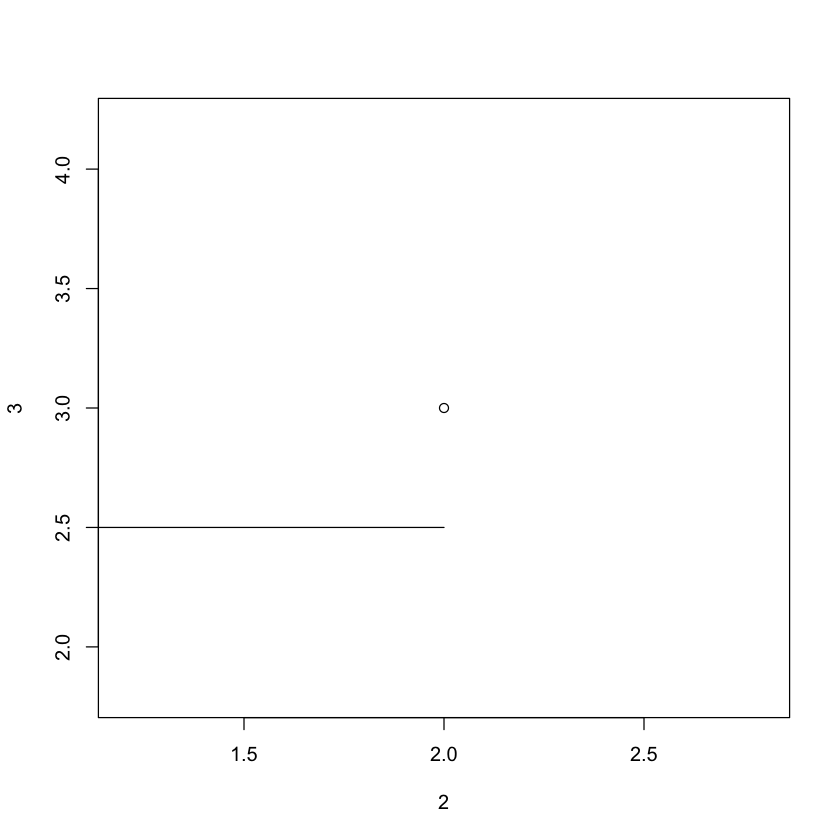

In [111]:
plot(2, 3)
lines(c(2.5, 2.5))

In [19]:
ind_m_perm<-(data_BMI_perm[,"SEX"]==1)
mean(data_BMI_perm[ind_m_perm,"BMI"])-mean(data_BMI_perm[!ind_m_perm,"BMI"])

[1] -6.4

[1] -2.0 -0.8 -2.4  4.0 -4.8  0.4 -0.4  4.0 -4.4  4.0

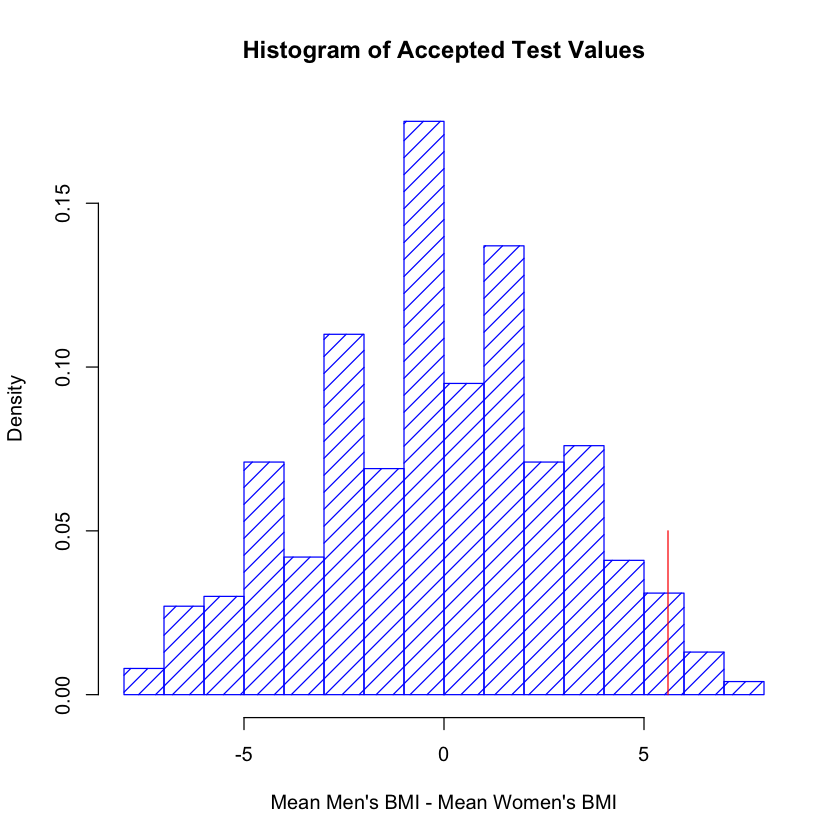

In [129]:
n_perms <- 1000
accepted_test_values <- 1:n_perms
for (i in 1:n_perms) {
    data_bmi_perms <- data_bmi
    perm_idx = sample(1:length(SEX))
    data_bmi_perms[, 'SEX'] = data_bmi[perm_idx, 'SEX']
    bmi_man_bool_index = data_bmi_perms['SEX'] != 0
    accepted_test_values[i] = mean(data_bmi_perms[bmi_man_bool_index, 'BMI']) - mean(data_bmi_perms[!bmi_man_bool_index, 'BMI'])
}


accepted_test_values[0:10]


hist(accepted_test_values, probability=TRUE, breaks='Sturges', density=10, main='Histogram of Accepted Test Values', xlab="Mean Men's BMI - Mean Women's BMI", col='blue')
# abline(v=test_statistic, col='red')
lines(c(test_statistic, test_statistic), c(0, .05), col='red')

In [130]:
p_value = mean(accepted_test_values > test_statistic)
p_value

[1] 0.025

## Conclusion
Under the assumption that there's no association between gender and BMI, the p-value .25% indicatest that there's a low probability to obtain such as value that is as large as the mean difference between men's and women's BMIs (`test_statistic`) as found in the original dataset.